In [1]:
!git clone https://github.com/nazarbeldyaga/ai-image-processing.git
%cd ai-image-processing
!pip install -r requirements.txt

Cloning into 'ai-image-processing'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 8 (delta 1), reused 8 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (8/8), done.
Resolving deltas: 100% (1/1), done.
/content/ai-image-processing


Using Colab cache for faster access to the 'opencv-samples-images' dataset.
Files in folder: ['hand.jpg', 'house.jpg', 'Background_Subtraction_Tutorial_frame.mp4', 'someshapes.jpg', 'Origin_of_Species.jpg', 'Background_Subtraction_Tutorial_frame.png', 'scan.jpg', 'minions.jpg', 'waldo.jpg', 'blobs.jpg', 'Background_Subtraction_Tutorial_frame_1.png', 'data', 'Background-Subtraction-Tutorial_merged.gif', 'Background-Subtraction-Tutorial_merged.mp4', 'WaldoBeach.jpg']


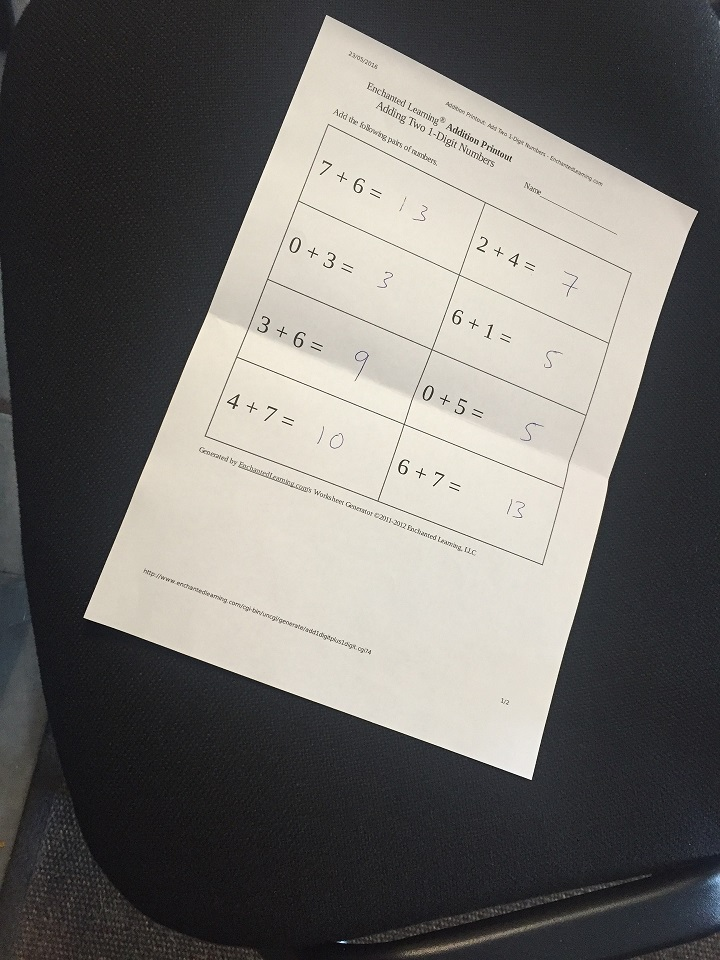

In [3]:
import kagglehub
import cv2
import os

path = kagglehub.dataset_download("bulentsiyah/opencv-samples-images")

print("Files in folder:", os.listdir(path))
image_filename = "scan.jpg"
full_path = os.path.join(path, image_filename)

img = cv2.imread(full_path)

if img is not None:
    try:
        from google.colab.patches import cv2_imshow
        cv2_imshow(img)
    except ImportError:
        cv2.imshow('My image', img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
else:
    print("No file:", full_path)